## Discussion Question
This histogram describes a **year** of daily temperatures.
<img src = 'temperature.jpg' width = 600 />
* What proportion of days had a high temp in the range 60-69?
    * Within range 60-70 of the high (yellow bars), the height of the bar is about 4.8. Thus, the area is (70-60) * 4.8 = 48%
* What proportion had a low of 45 or more?
    * We first find the area of the bars that corresponds to low of less than 45
        * (0.1 * 5) + (0.6 * 5) + (2 * 5) = 13.5 %
    * Then we calculate 100% - 13.5 % = 86.5%
* How many days had a difference of more than 20 degrees between their high & low temperatures?
    * This histogram can't answer that question because it only shows that the lows and highs are around certain temperature range and the frequency in a year

In [15]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Defining Functions
We are building up a useful inventory of techniques for identifying patterns and themes in a data set by using functions already available in Python. We will now explore a core feature of the Python programming language: **function definition**.

We have used functions extensively already, but we **never defined a function of our own**. The purpose of defining a function is to give a name to a computational process that may be applied multiple times. There are many situations in computing that require repeated computation. For example, it is often the case that we want to perform the same manipulation on every value in a column of a table.

## Def Statements
User defined functions give names to blocks of code
<img src = 'function.jpg'/>

In [19]:
# The function 'fahrenheit' takes in a celsius temperature and converts it to fahrenheit
def fahrenheit(x):
    return x * (9/5) + 32

When we run the cell above, no particular number is converted to fahrenheit, and the code inside the body of **fahrenheit** is not yet evaluated. This is similar to a recipe: each time we follow the instructions in a recipe, we need to start with ingredients. Each time we want to use our function to convert a number to fahrenheit, we need to specify a number.

We can call **fahrenheit** in the same way we have called other functions. Each time we do that, the code in the body is executed, with the value of the argument given the name x.

In [3]:
fahrenheit(100)

212.0

In [4]:
fahrenheit(400/30)

56.0

The two expressions above are both call expressions. In the second one, the value of the expression 400/30 is computed and then passed as the argument named x to the **fahrenheit** function. Each call expresson results in the body of **fahrenheit** being executed, but with a different value of x.

The body of **fahrenheit** has only a single line:

return x * (9/5) + 32

Executing this return statement completes execution of the **fahrenheit** function’s body and computes the value of the call expression.

The argument to **fahrenheit** can be any expression, as long as its value is a number. For example, it can be a name. The **fahrenheit** function does not know or care how its argument is computed or stored; its only job is to execute its own body using the values of the arguments passed to it.

In [5]:
anything = 42
fahrenheit(anything)

107.60000000000001

The argument can also be any value that can be converted to fahrenheit. For example, a whole array of numbers can be passed as an argument to **fahrenheit**, and the result will be another array.

In [6]:
fahrenheit(make_array(30, 10, 60))

array([ 86.,  50., 140.])

However, names that are defined inside a function, including arguments like **fahrenheit**’s x, have only a fleeting existence. They are defined only while the function is being called, and they are only accessible inside the body of the function. We can’t refer to x outside the body of **fahrenheit**. The technical terminology is that **x has local scope**.

Therefore the name x isn’t recognized outside the body of the function, even though we have called fahrenheit in the cells above.

In [7]:
x

NameError: name 'x' is not defined

However, if we define 'x' in a global scope:

In [ ]:
x = 25
fahrenheit(x)

Then **fahrenheit** would work just fine!

## Discussion Question
1. What does this function do?
2. What kind of input does it take?
3. What output will it give?
4. What's a reasonable name?

In [ ]:
def f(s):
    return np.round(s / sum(s) * 100, 2)

1. It will take an array of numbers and convert each element of the array to a percentage or proportion with respect so the sum of all the numbers in the array.
2. It takes an array of numbers
3. It gives out an array of numbers (more specifically, in percentage)
4. Proportionator, or Percent, or Percentage. Since this function computes the percent of each number in the array.

## Docstring
In reality, many functions perform complicated tasks and are difficult to use without explanation. Therefore, a well-composed function has a name that evokes its behavior, as well as a documentation. In Python, this is called a **docstring** — a description of its behavior and expectations about its arguments. A docstring can also show example calls to the function, where the call is preceded by >>>.

A docstring can be any string, as long as it is the first thing in a function’s body. Docstrings are typically defined using triple quotation marks at the start and end, which allows a string to span multiple lines. The first line is conventionally a complete but short description of the function, while following lines provide further guidance to future users of the function.

Here is a definition of a function called percent that takes an argument: an array of numbers. The definition includes a docstring.

In [5]:
def percents(counts):
    """ Converts counts to percents out of the total."""
    total = counts.sum()
    return np.round(counts/total * 100, 2) # Recall 2 here means 2 decimal places

In [6]:
percents(make_array(2, 4, 6))

array([16.67, 33.33, 50.  ])

Let's say we want to change the decimal places. It would be a hassle if we go back to the **percents** function and change the second argument in **np.round**. 

## Multiple Arguments
There can be multiple ways to generalize an expression or block of code, and so a function can take multiple arguments that each determine different aspects of the result. For example, the percents function we defined previously rounded to two decimal places every time. The following two-argument definition allows different calls to round the decimal places to different amounts.


In [7]:
def percents_decimal(counts, decimal_places):
    """ Converts counts to percents out of the total"""
    total = counts.sum()
    return np.round(counts/total * 100, decimal_places)

In [8]:
percents_decimal(make_array(2, 4, 6), 3)

array([16.667, 33.333, 50.   ])

The flexibility of this new definition comes at a small price: **each time the function is called, the number of decimal places must be specified**. Default argument values allow a function to be called with a variable number of arguments; any argument that isn’t specified in the call expression is given its default value, which is stated in the first line of the def statement. For example, in this final definition of percents, the optional argument decimal_places is given a default value of 2.

In [12]:
def percents_decimal(counts, decimal_places = 2):
    """ Converts counts to percents out of the total"""
    total = counts.sum()
    return np.round(counts/total * 100, decimal_places)

In [13]:
percents_decimal(make_array(2, 4, 6))

array([16.67, 33.33, 50.  ])

In [14]:
percents_decimal(make_array(2, 4, 6), 4)

array([16.6667, 33.3333, 50.    ])

## Interact Function

Earlier, we had to call a function different times if we want to see the output from different inputs. For example:

In [16]:
percents_decimal(make_array(2, 4, 6))

array([16.67, 33.33, 50.  ])

In [17]:
percents_decimal(make_array(1, 3, 10))

array([ 7.14, 21.43, 71.43])

The **interact** function calls your functions interactively. We can make an **interactive** function by passing a function into it. Note we need to import from **ipywidgets** to be able to use **interact**. The second argument is the default value.

In [20]:
_ = interact(fahrenheit, x=40)

interactive(children=(IntSlider(value=40, description='x', max=120, min=-40), Output()), _dom_classes=('widget…

## Applying Functions to a Column
We have seen many examples of creating new columns of tables by applying functions to existing columns or to other arrays. All of those functions took arrays as their arguments. But frequently we will want to convert the entries in a column by a function that doesn’t take an array as its argument. For example, it might take just one number as its argument, as in the function **cut_off_at_100** defined below.

In [22]:
def cut_off_at_100(x):
    """The smaller of x and 100"""
    return min(x, 100)

In [23]:
cut_off_at_100(23)

23

In [24]:
cut_off_at_100(532)

100

In [25]:
cut_off_at_100(100)

100

The function **cut_off_at_100** simply returns the argument if the argument is less than or equal to 100. But if the argument is greater than 100, it returns 100.

In our earlier examples using Census data, we saw that the variable AGE had a value 100 that meant “100 years old or older”. Cutting off ages at 100 in this manner is exactly what **cut_off_at_100 does**.

To use this function on many ages at once, we will have to be able to refer to the function itself, without actually calling it. Analogously, we might show a cake recipe to a chef and ask her to use it to bake 6 cakes. In that scenario, we are not using the recipe to bake any cakes ourselves; our role is merely to refer the chef to the recipe. Similarly, we can ask a table to call cut_off_at_100 on 6 different numbers in a column.

First, we create the table ages with a column for people and one for their ages. For example, person C is 52 years old.

In [26]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages

Person,Age
A,17
B,117
C,52
D,100
E,6
F,101


## Apply
The **apply** method creates an array by calling a function on every element in input column.
* 1st argument: Function to apply
* 2nd argument: The input column(s)

The call looks like the following:

In [ ]:
table_name.apply(function_name, 'column_label')

To cut off each of the ages at 100, we will use the **apply**. The apply method calls a function on each element of a column, forming a new array of return values. To indicate which function to call, just name it (without quotation marks or parentheses). The name of the column of input values is a string that must still appear within quotation marks.

In [27]:
ages.apply(cut_off_at_100, 'Age')

array([ 17, 100,  52, 100,   6, 100])

What we have done here is apply the function **cut_off_at_100** to each value in the Age column of the table ages. The output is the array of corresponding return values of the function. For example, 17 stayed 17, 117 became 100, 52 stayed 52, and so on.

This array, which has the same length as the original Age column of the ages table, can be used as the values in a new column called **Cut Off Age** alongside **Person** and **Age** columns.

In [28]:
ages.with_column(
    'Cut Off Age', ages.apply(cut_off_at_100, 'Age')
)

Person,Age,Cut Off Age
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


### Function as Values
We’ve seen that Python has many kinds of values.
* 6 is a number value
* "cake" is a text value
* Table() is an empty table
* ages is a name for a table value (since we defined it above).

In Python, every function, including **cut_off_at_100**, is also a value. It helps to think about recipes again. A recipe for cake is a real thing, distinct from cakes or ingredients, and you can give it a name like “Ani’s cake recipe.” When we defined cut_off_at_100 with a def statement, we actually did two separate things: 
1. We created a function that cuts off numbers at 100
2. We gave it the name **cut_off_at_100**

We can refer to any function by writing its name, without the parentheses or arguments necessary to actually call it. We did this when we called **apply above**. When we write a function’s name by itself as the last line in a cell, Python produces a text representation of the function, just like it would print out a number or a string value.

In [29]:
cut_off_at_100

<function __main__.cut_off_at_100(x)>

Notice that we did not write "cut_off_at_100" with quotes (which is just a piece of text), or cut_off_at_100() (which is a function call, and an invalid one at that). We simply wrote cut_off_at_100 to refer to the function.

Just like we can define new names for other values, we can define new names for functions. For example, suppose we want to refer to our function as **cut_off** instead of **cut_off_at_100**. We can just write this:

In [30]:
cut_off = cut_off_at_100

Now cut_off is a name for a function. It’s the same function as cut_off_at_100, so the printed value is exactly the same.

In [31]:
cut_off

<function __main__.cut_off_at_100(x)>

## Example: Prediction
Data Science is often used to make predictions about the future. If we are trying to predict an outcome for a particular individual – for example, how she will respond to a treatment, or whether he will buy a product – it is natural to base the prediction on the outcomes of other similar individuals.

Charles Darwin’s cousin Sir Francis Galton was a pioneer in using this idea to make predictions based on numerical data. He studied how physical characteristics are passed down from one generation to the next.

The data below are Galton’s carefully collected measurements on the **heights of parents and their adult children**. 
* Each row corresponds to one adult child
* The variables are: 
    * A numerical code for the family
    * The heights (in inches) of the father and mother
    * A “midparent height” which is a weighted average [1] of the height of the two parents
    * The number of children in the family
    * The child’s birth rank (1 = oldest), gender, and height.

In [32]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


A primary reason for collecting the data was to be able to predict the adult height of a child born to parents similar to those in the dataset. Let us try to do this, using **midparentHeight** as the variable on which to base our prediction. Thus midparentHeight is our predictor variable.

The table **heights** below consists of just the midparent heights and child’s heights. The scatter plot of the two variables shows a positive association, as we would expect for these variables.

In [39]:
heights = galton.select(3, 7).relabel(0, 'MidParent').relabel(1, 'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


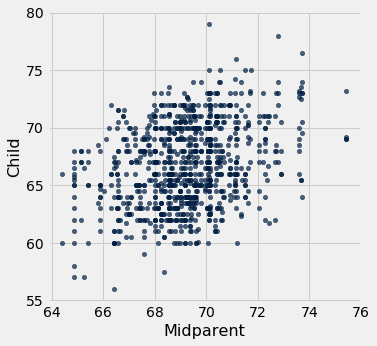

In [37]:
heights.scatter(0) # The first argument of scatter is the x-axis

The scatter plot of the 2 variables shows a positive association, as we would expect for these variables.

Now suppose Galton encountered a new couple, similar to those in his dataset, and wondered how tall their child would be. What would be a good way for him to go about predicting the child’s height, given that the midparent height was, say, 68 inches?

One reasonable approach would be to base the prediction on all the points that correspond to a midparent height of around 68 inches. The prediction equals the average child’s height calculated from those points alone.

For now we will just make a reasonable definition of what “around 68 inches” means, and work with that. Later in the course we will examine the consequences of such choices.

We will define "close" as “within half an inch”. The figure below shows all the points corresponding to a midparent height between 67.5 inches and 68.5 inches. These are all the points in the strip between the red lines. Each of these points corresponds to one child; our prediction of the height of the new couple’s child is the average height of all the children in the strip. That’s represented by the gold dot.

Ignore the code, and just focus on understanding the mental process of arriving at that gold dot.

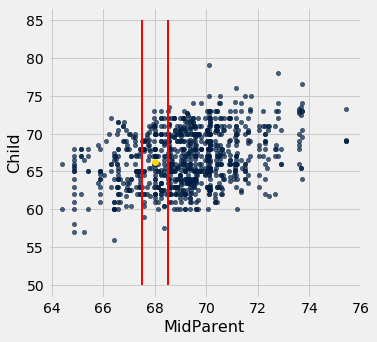

In [40]:
heights.scatter('MidParent')
_ = plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plots.scatter(68, 66.24, color='gold', s=40)

In order to calculate exactly where the gold dot should be, we first need to indentify all the points in the strip. These correspond to the rows where MidParent is between 67.5 inches and 68.5 inches.

In [41]:
close_to_68 = heights.where('MidParent', are.between(67.5, 68.5))
close_to_68

MidParent,Child
68.44,62
67.94,71.2
67.94,67
68.33,62.5
68.23,73
68.23,72
68.23,69
67.98,73
67.98,71
67.98,71


The predicted height of a child who has a midparent height of 68 inches is the average height of the children in these rows.

In [42]:
close_to_68.column('Child').mean()

66.24045801526718

That's 66.24 inches.

We now have a way to predict the height of a child given any value of the midparent height near those in our dataset. We can define a function **predict_child** that does this. The body of the function consists of the code in the two cells above, apart from choices of names.

In [44]:
def predict_child(mpht):
    """Predict the height of a child whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children whose midparent height is
    in the range mpht + or - 0.5.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()                       

Given a midparent height of 68 inches, the function predict_child returns the same prediction (66.24 inches) as we got earlier. The advantage of defining the function is that we can easily change the value of the predictor and get a new prediction.

In [45]:
predict_child(68)

66.24045801526718

In [46]:
predict_child(74)

70.41578947368421

How good are these predictions? We can get a sense of this by comparing the predictions with the data that we already have. To do this, we first apply the function predict_child to the column of Midparent heights, and collect the results in a new column called Prediction.

In [48]:
# Apply predict_child to all the midparent heights

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)
heights_with_predictions

MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


To see where the predictions lie relative to the observed data, we can draw overlaid scatter plots with MidParent as the common horizontal axis.

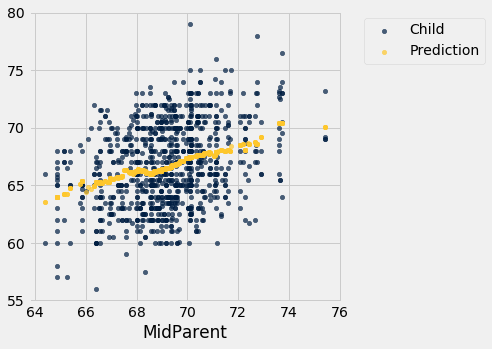

In [49]:
heights_with_predictions.scatter('MidParent')

The graph of gold dots is called a graph of averages, because each gold dot is the center of a vertical strip like the one we drew earlier. Each one provides a prediction of a child’s height given the midparent height. For example, the scatter shows that for a midparent height of 72 inches, the predicted height of the child would be somewhere between 68 inches and 69 inches, and indeed predict_child(72) returns 68.5.

Galton’s calculations and visualizations were very similar to ours, except that he didn’t have Python. He drew the graph of averages through the scatter diagram and noticed that it roughly followed a straight line. This straight line is now called the **regression line** and is one of the most common methods of making predictions. Galton’s friend, the mathematician Karl Pearson, used these analyses to formalize the notion of correlation.

This example, like the one about John Snow’s analysis of cholera deaths, shows how some of the fundamental concepts of modern data science have roots going back more than a century. Galton’s methods such as the one we have used here are precursors to nearest neighbor prediction methods that now have powerful applications in diverse settings. The modern field of machine learning includes the automation of such methods to make predictions based on vast and rapidly evolving datasets.